In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

1. Plot the rolling 20-day minimum of the Facebook closing price using pandas.

In [2]:
fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

In [3]:
fb_close_min = fb['close'].rolling(20).min()

<AxesSubplot:xlabel='date'>

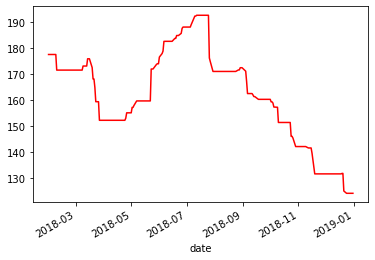

In [4]:
fb_close_min.plot(style = ['r'])

2. Create a histogram and KDE of the change from open to close in the price of Facebook stock.

Text(0.5, 0, 'Change in $')

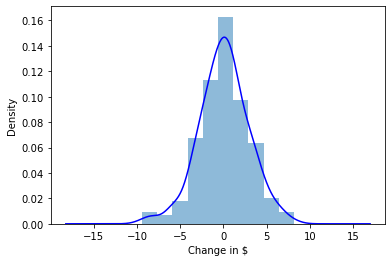

In [5]:
fb_change = fb.assign(
    **{'change': lambda x: fb.close - fb.open}
)

ax = fb_change.change.plot(kind='hist', density=True, alpha=0.5)
fb_change.change.plot(
    ax=ax, kind='kde', color='blue',
    title=''
)
plt.xlabel('Change in $')
#review density

3. Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.

In [6]:
quakes = pd.read_csv('data/earthquakes.csv')

Text(0, 0.5, 'magnitude')

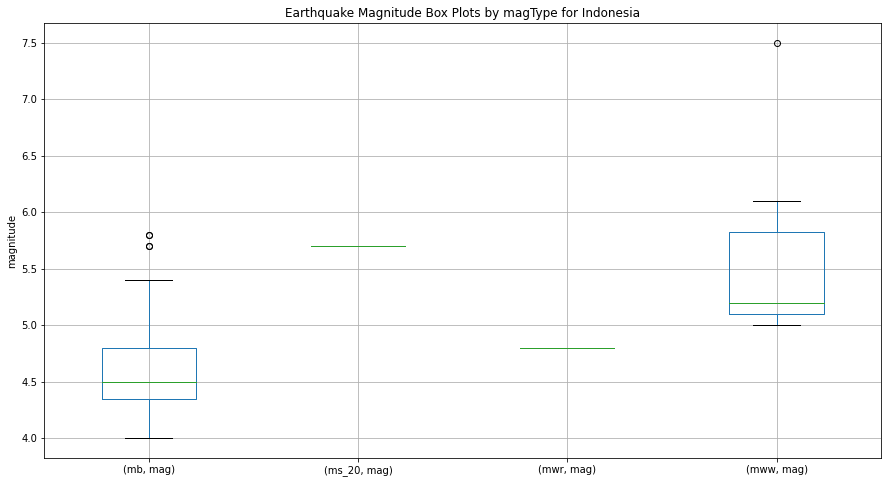

In [7]:
quakes.query('parsed_place == "Indonesia"')[['mag', 'magType']].groupby('magType').boxplot(
    figsize=(15, 8), subplots=False
)
plt.title('Earthquake Magnitude Box Plots by magType for Indonesia')
plt.ylabel('magnitude')

4. Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single line.

In [8]:
weekly_max_high = fb.high.resample('1W').max()
weekly_max_high.head()

date
2018-01-07    186.90
2018-01-14    188.90
2018-01-21    182.37
2018-01-28    190.66
2018-02-04    195.32
Freq: W-SUN, Name: high, dtype: float64

In [9]:
weekly_min_low = fb.low.resample('1W').min()
weekly_min_low.head()

date
2018-01-07    177.55
2018-01-14    177.40
2018-01-21    175.80
2018-01-28    180.41
2018-02-04    181.84
Freq: W-SUN, Name: low, dtype: float64

In [10]:
weekly_change = weekly_max_high - weekly_min_low

<AxesSubplot:title={'center':'difference between the weekly maximum high price and the weekly minimum low price for Facebook'}, xlabel='date'>

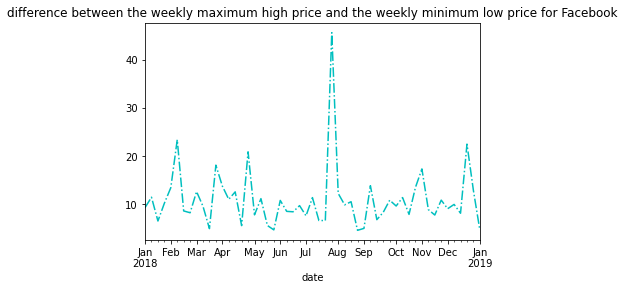

In [11]:
weekly_change.plot(style='-.c',
                  title = 'difference between the weekly maximum high price and the weekly minimum low price for Facebook')

5. Plot the 14-day moving average of the daily change in new COVID-19 cases in Brazil, China, India, Italy, Spain, and the USA:
    a) First, use the diff() method that was introduced in the Working with time series data section of Chapter 4, Aggregating Pandas DataFrames, to calculate the day-over-day change in new cases. Then, use rolling() to calculate the 14-daymoving average.
    b) Make three subplots: one for China; one for Spain and Italy; and one for Brazil,India, and the USA.

In [18]:
covid = pd.read_csv('data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

In [21]:
new_cases_rolling_average = covid.pivot_table(
    index=covid.index, 
    columns='countriesAndTerritories', 
    values='cases'
).diff().rolling(14).mean()

<AxesSubplot:xlabel='date'>

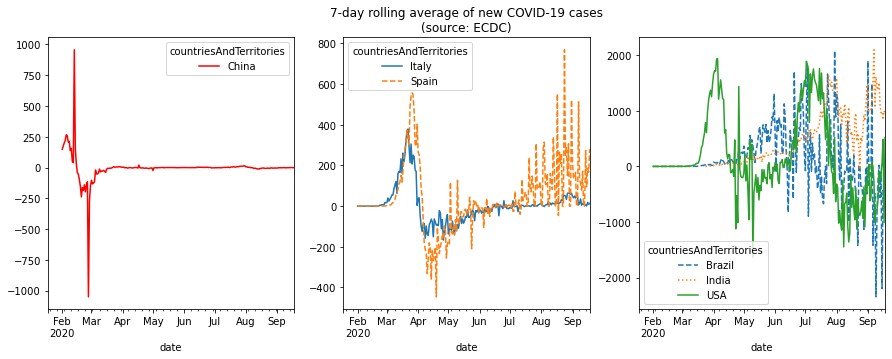

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

new_cases_rolling_average[['China']].plot(ax=axes[0], color='red')
new_cases_rolling_average[['Italy', 'Spain']].plot(
    ax=axes[1], style=['-', '--'], 
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)
new_cases_rolling_average[['Brazil', 'India', 'USA']]\
    .plot(ax=axes[2], style=['--', ':', '-'])

6. Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock prices:
    a) The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price (be sure to review the Workingwith time series data section of Chapter 4, Aggregating Pandas DataFrames, for an easy way to do this).
    b) The second subplot will be a bar plot showing the net effect this had monthly, using resample().
       c) Bonus #1: Color the bars according to whether there are gains in the stock price (green) or drops in the stock price (red).
    d) Bonus #2: Modify the x-axis of the bar plot to show the three-letter abbreviation for the month.

In [50]:
fb_change = fb.assign(
    prior_close=lambda x: x.close.shift(),
    after_hours_change_in_price=lambda x: x.open - x.prior_close)

In [78]:
fb_monthly=fb.resample("1M").mean().assign(
    prior_close_monthly=lambda x: x.close.shift(),
    after_hours_change_in_price_monthly=lambda x: x.open - x.prior_close_monthly,
    )
fb_monthly.index = fb_monthly.index.strftime('%b\%Y')
fb_monthly

,open,high,low,close,volume,prior_close_monthly,after_hours_change_in_price_monthly
date,,,,,,,
Jan\2018,184.364762,186.210952,182.924757,184.962857,2.360265e+07,NaN,NaN
Feb\2018,180.721579,183.131405,177.756642,180.269474,2.719063e+07,184.962857,-4.241278
Mar\2018,173.449524,176.168929,170.508095,173.489524,4.743964e+07,180.269474,-6.819950
Apr\2018,164.163557,166.086600,161.546238,163.810476,3.576811e+07,173.489524,-9.325967
May\2018,181.910509,183.873145,180.950032,182.930000,1.823383e+07,163.810476,18.100033
Jun\2018,194.974067,196.797348,193.179524,195.267619,1.844123e+07,182.930000,12.044067
Jul\2018,199.332143,201.598095,197.504767,199.967143,3.108396e+07,195.267619,4.064524
Aug\2018,177.598443,179.433913,175.680935,177.491957,2.387030e+07,199.967143,-22.368699
Sep\2018,164.232895,166.399253,162.416726,164.377368,2.634047e+07,177.491957,-13.259062


<AxesSubplot:title={'center':'monthly net effect'}, xlabel='date'>

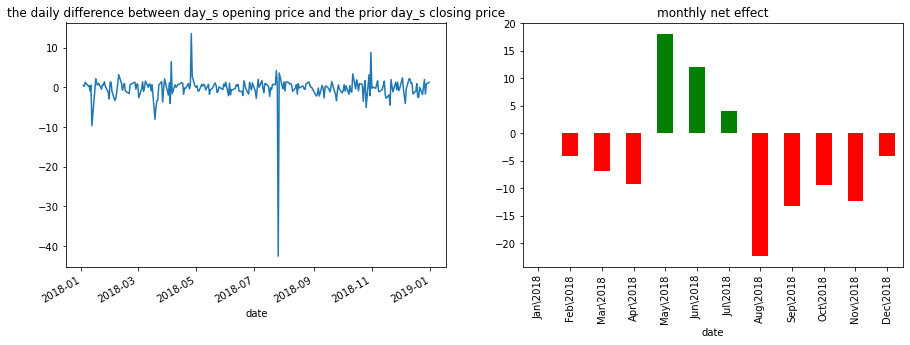

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fb_change.after_hours_change_in_price.plot(ax=axes[0],
    kind='line', title = 'the daily difference between day_s opening price and the prior day_s closing price'),
fb_monthly.after_hours_change_in_price_monthly.plot(ax=axes[1],
    kind='bar', title = 'monthly net effect', color = np.where(fb_monthly.after_hours_change_in_price_monthly > 0, 'green', 'red'))